# Part I - (Exploration on Ford GoBike Trip Data)
## by (Bright Ofori Boye Eshun)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The individuals have been group by gender(male, female and other) and by the type of users they are, whether subcribers or customers. The birth years of the individuals were also given, hence we can go on to calculate for their ages since the year at the time was given as 2019.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('datasets/201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#check theh data types for the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# check the number of row and columns in the dataset 
df.shape

(183412, 16)

In [5]:
# define a function to drop rows and columns 
def change_to_date(col):
    df[col] = pd.to_datetime(df[col])

In [6]:
# changing columns to date
change_to_date( 'end_time')
change_to_date( 'start_time')

In [7]:
# confirm changed data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [8]:
# pushed bike_id column to column index 0
bike_id_column = df.pop('bike_id')
df.insert(0, 'bike_id', bike_id_column)

In [9]:
# confirm 
df.head(3)

,bike_id,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,4902,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No
1,2535,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,Customer,NaN,NaN,No
2,5905,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No


In [10]:
# convert member_birth_year to Int data type
df['member_birth_year'] = df['member_birth_year'].astype('Int64')

In [11]:
# creating age colum from the year and birth years
df['age'] = (2019 - df['member_birth_year'])


In [12]:
# confirm a creation of the age column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   bike_id                  183412 non-null  int64         
 1   duration_sec             183412 non-null  int64         
 2   start_time               183412 non-null  datetime64[ns]
 3   end_time                 183412 non-null  datetime64[ns]
 4   start_station_id         183215 non-null  float64       
 5   start_station_name       183215 non-null  object        
 6   start_station_latitude   183412 non-null  float64       
 7   start_station_longitude  183412 non-null  float64       
 8   end_station_id           183215 non-null  float64       
 9   end_station_name         183215 non-null  object        
 10  end_station_latitude     183412 non-null  float64       
 11  end_station_longitude    183412 non-null  float64       
 12  user_type       

In [13]:
# check general statistics of you data
df.describe()

,bike_id,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,age
count,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,175147.000000,175147.000000
mean,4472.906375,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,1984.806437,34.193563
std,1664.383394,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,10.116689,10.116689
min,11.000000,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,1878.000000,18.000000
25%,3777.000000,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,1980.000000,27.000000
50%,4958.000000,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,1987.000000,32.000000
75%,5502.000000,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,1992.000000,39.000000
max,6645.000000,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,2001.000000,141.000000


In [14]:
# check for correlation
df.corr()

,bike_id,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,age
bike_id,1.000000,-0.006133,-0.064677,0.049996,-0.141782,-0.054607,0.049244,-0.143527,0.036145,-0.036145
duration_sec,-0.006133,1.000000,-0.008652,0.010513,-0.037930,0.003064,0.010873,-0.038906,-0.006027,0.006027
start_station_id,-0.064677,-0.008652,1.000000,-0.190978,0.459169,0.336227,-0.179771,0.466755,0.115115,-0.115115
start_station_latitude,0.049996,0.010513,-0.190978,1.000000,-0.677227,-0.179727,0.989969,-0.682637,-0.075826,0.075826
start_station_longitude,-0.141782,-0.037930,0.459169,-0.677227,1.000000,0.479688,-0.681815,0.992410,0.125590,-0.125590
end_station_id,-0.054607,0.003064,0.336227,-0.179727,0.479688,1.000000,-0.197992,0.469027,0.112709,-0.112709
end_station_latitude,0.049244,0.010873,-0.179771,0.989969,-0.681815,-0.197992,1.000000,-0.684197,-0.075927,0.075927
end_station_longitude,-0.143527,-0.038906,0.466755,-0.682637,0.992410,0.469027,-0.684197,1.000000,0.126421,-0.126421
member_birth_year,0.036145,-0.006027,0.115115,-0.075826,0.125590,0.112709,-0.075927,0.126421,1.000000,-1.000000
age,-0.036145,0.006027,-0.115115,0.075826,-0.125590,-0.112709,0.075927,-0.126421,-1.000000,1.000000


In [15]:
df.to_csv('datasets/wrangled_data.csv', index=False)

### What is the structure of your dataset?

> The data has 183412 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> I want to know if the user_type, member_birth_year, member_gender affects the duration of the trip.
>
> I want to know which of the user type was majority and grouped under gender which of them took longer rides.
>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> These features: user_type, member_birth_year, member_gender and duration_user will support in my investigations

## Univariate Exploration


In [16]:
base_color = sb.color_palette()[0]

#### let's investigate the duration_sec

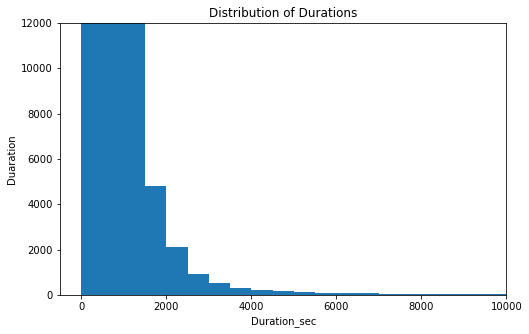

In [17]:
bins = np.arange(0, df['duration_sec'].max()+500, 500)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Duaration')
plt.axis([-500, 10000, 0, 12000])
plt.show()

<ipython-input-18-c30088b6c3f7>:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 14000])


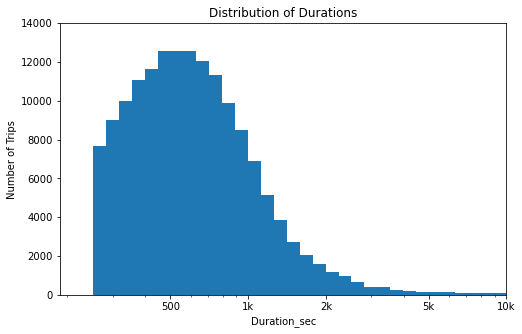

In [18]:
# to make the graph more clearer lets use a log graph
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 14000])
plt.show();

>- Most trips were within the 250 sec to 2000 secs range. 
>- At around less than 250 sec number of trips begin to increase from 8000 to 12000 where it peaks at 600 secs, then begin to decline as duration approaches 2000 secs.

#### Let's check the distribution of ages

In [19]:
df_age = df.dropna()

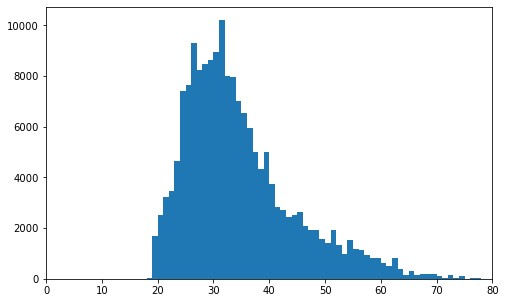

In [20]:
age_bins = np.arange(0, df['age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = df_age, x = 'age', bins=age_bins);
plt.xlim(0, 80);

>- Base on the age dustribution graph above the distribution is skewed positively.

>- The distibution is concentrated between the ages of 20 and 40 years.

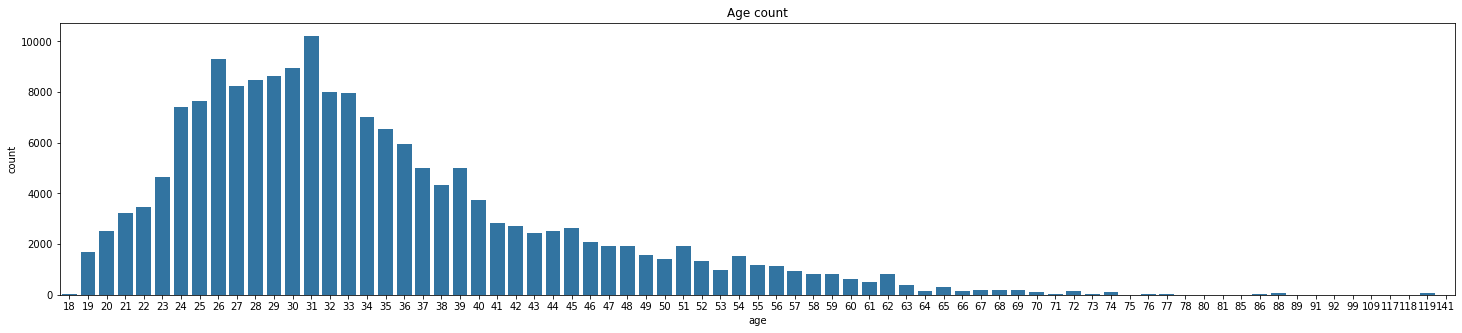

In [21]:
plt.figure(figsize=(25, 5))
sb.countplot(data=df.dropna(), x='age', color=base_color);
plt.title('Age count');

>- Age 31 had the highest count

#### let check the number of customer and subscribers in users

In [22]:
user_type_order= df['user_type'].value_counts().index

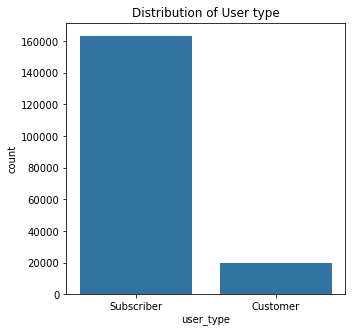

In [23]:
# plot age distribution
base_color = sb.color_palette()[0]
plt.figure(figsize=(5, 5))
sb.countplot(data=df, x='user_type', color=base_color, order=user_type_order)
plt.title('Distribution of User type');

In [24]:
# checking for the maximum proportion in user types
number_users = df.user_type.value_counts().sum()
max_user_type_count = df.user_type.value_counts()[0]
max_prop = max_user_type_count/number_users
max_prop

0.8916755719364055

In [25]:
tick_props = np.arange(0, max_prop, 0.25)
print(tick_props)

[0.   0.25 0.5  0.75]


In [26]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

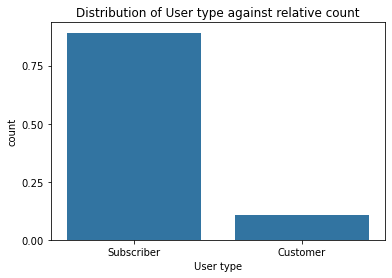

In [27]:
sb.countplot(data=df, x='user_type', color=base_color, order=user_type_order)
# Change the tick locations and labels
plt.yticks(tick_props * number_users, tick_names)
plt.title('Distribution of User type against relative count')
plt.xlabel('relative count')
plt.xlabel('User type');

>- Amongst the users, subscribers occupied more than 0.75(75%) of the total.

##### let's plot a pie chart to visulize the gender column

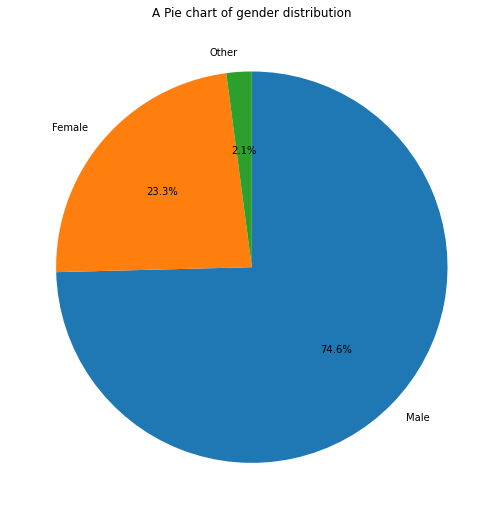

In [28]:
counts_for_users  = df['member_gender'].value_counts()
plt.figure(figsize=[9, 9])
plt.pie(counts_for_users , labels = counts_for_users .index, autopct='%1.1f%%', startangle = 90, counterclock = False, )
plt.title('A Pie chart of gender distribution');

>- Users who identified as male were 74.6% of the total

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All trips crossed 250 secs but majority of the trips were concerntrated around the between 250 sec to 2000 secs. The number of males were more than even twice the number of females and more than 30 times that of people who identified as other. About 10,000 users were 31 year olds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The ages of the users were calculated from the current year and the birth year. This was to be able plot distribution of ages from the trips.

## Bivariate Exploration



#### let's check the relationship  between duration and age

In [29]:


bins_y = np.arange(0, 85444+1000, 1000)
bins_x = np.arange(0, 141+5, 5)
df[['age', 'duration_sec']].describe()

,age,duration_sec
count,175147.000000,183412.000000
mean,34.193563,726.078435
std,10.116689,1794.389780
min,18.000000,61.000000
25%,27.000000,325.000000
50%,32.000000,514.000000
75%,39.000000,796.000000
max,141.000000,85444.000000


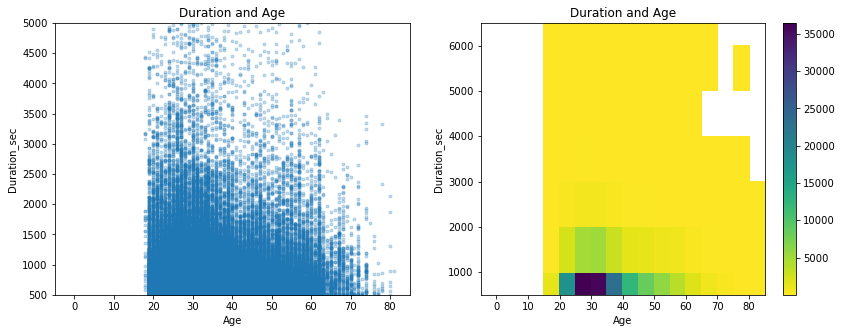

In [30]:
plt.figure(figsize=[14,5])
# plot 1: A scatter plot to check the relation between age and duration
plt.subplot(1, 2, 1)
plt.scatter(data=df_age, x='age', y='duration_sec', alpha = 0.25, marker = '.' )
plt.title('Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec');
plt.axis([-5, 85, 500, 5000])


# plot 1: A heapmap to check the relation between age and duration
plt.subplot(1, 2, 2)
plt.hist2d(data=df_age, x='age', y='duration_sec', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.title('Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec');
plt.axis([-5, 85, 500, 6500]);

>- from the heatmap the most frequent users who took longer trips were between the ages of 25 and 35 years
>- from the scatter plot most users who crossed the 1000 secs duration, range between the ages of 20 to 60 years

#### let's use a boxplot find the relation between gender and duration

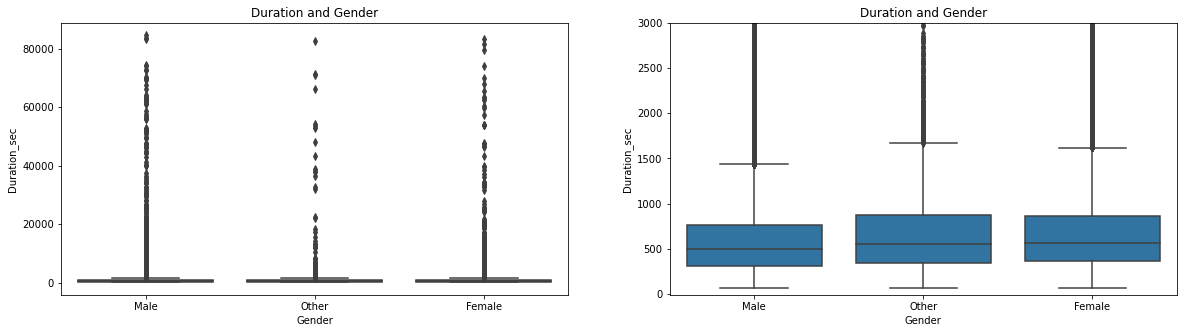

In [31]:
plt.figure(figsize=[20, 5])

## A boxplot to fins if there is a correlation between the duration and gender
plt.subplot(1, 2, 1)
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=base_color)
plt.title('Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec');

# since the ealier boxplot is not clear enough let's trim the ylimit to make it clearer
plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=base_color)
plt.title('Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec');
plt.ylim(-10, 3000);

>- from the boxplot on the above right, all three male, female and other have almost the same median value, but clearly both females and other ride longer trip than males.
> - all three have huge number of outliers.

#### a viloin plot to show the distribution of gender by age.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


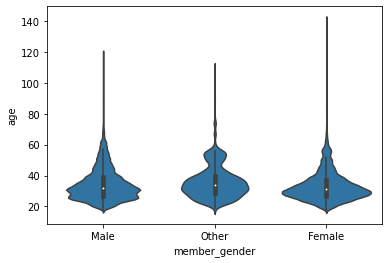

In [32]:
sb.violinplot(df['member_gender'], df['age'].astype(float), color=base_color);

>- most of the ages in all genders are concentrated between the ages of 20 and 40

#### let's show the relationship between duration and user type 

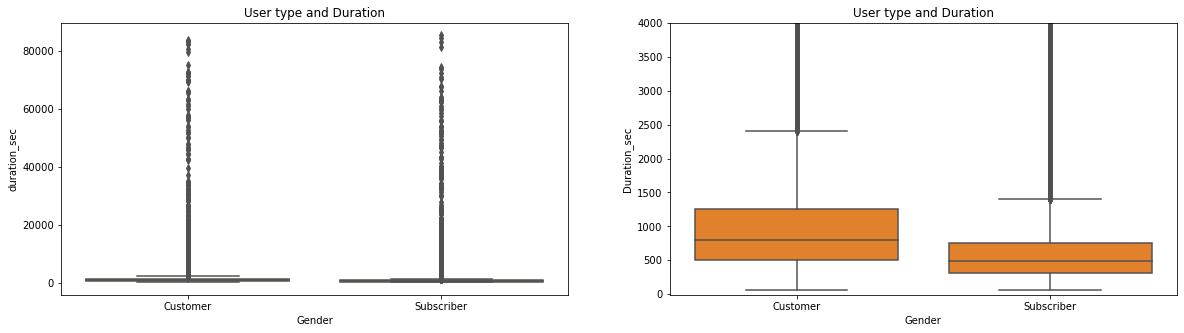

In [33]:
plt.figure(figsize = [20, 5])
# A boxplot to find if there is a correlation between the duration and user type
plt.subplot(1, 2, 1)
sb.boxplot(data=df, x='user_type', y='duration_sec', color=sb.color_palette()[1])
plt.title('User type and Duration')
plt.xlabel('Gender')


# since the ealier boxplot is not clear enough let's trim the y limit to make it clearer

plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='user_type', y='duration_sec', color=sb.color_palette()[1])
plt.title('User type and Duration')
plt.xlabel('Gender')
plt.ylabel('Duration_sec');
plt.ylim(-10, 4000);


>- from the boxplot on the above right, customers took longer rides than subcribers and also have a higher median duration than subcribers

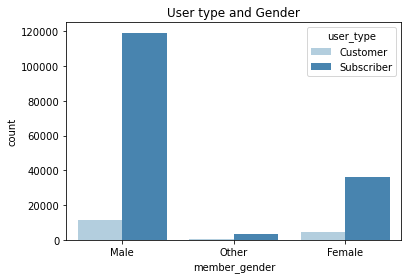

In [34]:
sb.countplot(data=df, hue='user_type', x='member_gender', palette='Blues')
plt.title('User type and Gender');

>- from the countplot above, there are more male subcribers and male customers than all genders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> The frequent users who took longer rides were between the ages of 25 and 35. The majority of users between the ages of 20 and 45 years were able to to ride for 1000 secs. All three genders had majority of their ages concerntrated around 20 to 40 years. Although there were more males, other and female took averaglely longer trips than males. Also users who were customer took averagely longer trips than subscriber although subcribers made up about 75% of the distribution. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Minority in both the gender and user type took longer trips than the majority.

## Multivariate Exploration


#### lets the realtionship between user_types, gender and duration together.

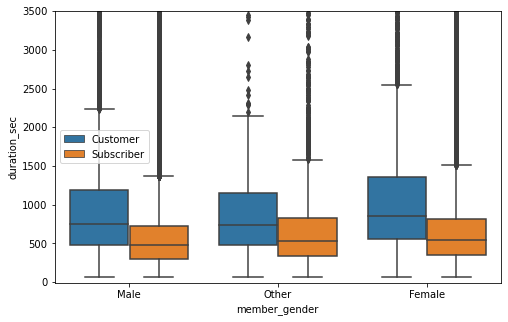

In [35]:
plt.figure(figsize=(8, 5))
sb.boxplot(data=df_age, y='duration_sec', x='member_gender', hue='user_type');
plt.ylim(-10, 3500);
plt.legend();

>- we notice female customers took longer rides than the rest of the gender of customers but amongst the subcribers other took longer rides than the rest of the genders. 

In [36]:
# create function to plot facet grids
def plot_facet_grid(data, x, y, z, title, xlabel, ylabel):
    facet = sb.FacetGrid(data = data, col = z, col_wrap = 2, height = 5,
                     xlim = [10, 80], ylim = [-500, 9000])
    facet.map(plt.scatter, x, y, alpha= 1)
    facet.set_xlabels(xlabel)
    facet.set_ylabels(ylabel)
    facet.fig.suptitle(title)
    plt.show()

####  Plot a facet grid to for user types against age and duration.

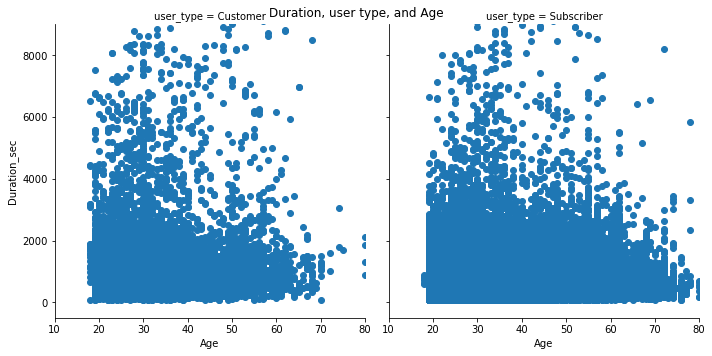

In [37]:
facet_user_type = plot_facet_grid(df.dropna(), 'age', 'duration_sec', 'user_type', 
                                  'Duration, user type, and Age', 'Age', 'Duration_sec')
facet_user_type

>- the trend for the distribution between the two graphs are the same. 
>- from the plot above we realised that there more subscribers between ages of 50 and 60 who took longer trips than  customers in the same age range.

#### plot facet grid for gender against age and duration

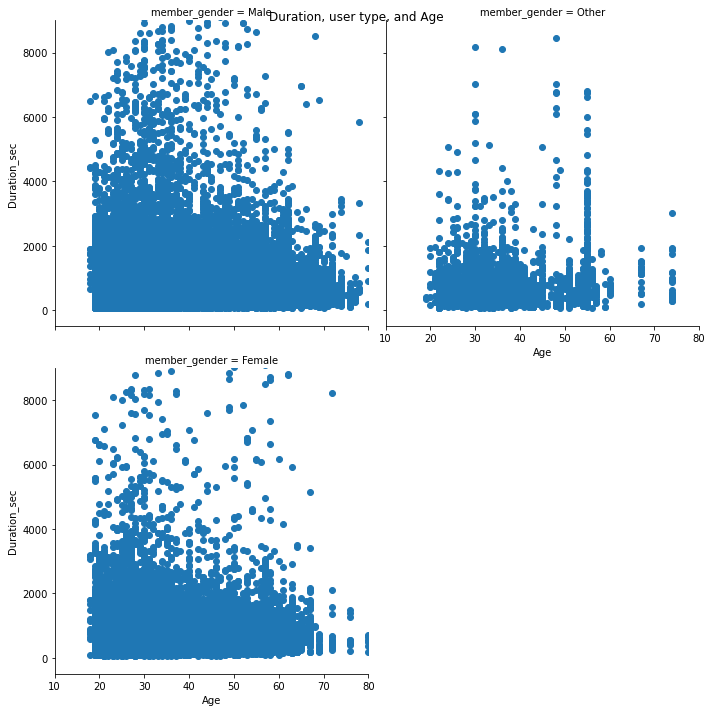

In [38]:
facet_member_gender = plot_facet_grid(df.dropna(), 'age', 'duration_sec', 'member_gender', 
                                  'Duration, user type, and Age', 'Age', 'Duration_sec')
facet_member_gender

>- from the plot above, we can see that the distribution is somehow the same for male and female but in other, the duration also decreases with age until it got to the ages around 55 years where the duration slightly jumps again. 
>- We can realise the duration for old age in others is relatively high.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The highest average duration by a customer was achieved by females and this was around 2500 secs, female customer took averagely longer rides than male and other customer. The average highest duration by a subsciber was achieved by other and this was a bit around 1500 secs, other subscibers took averagely longer rides than male and female subscibers. The distribution between duration, customers and age is quite the same  as the distribution between duration, subcriber and age, but old age wise, subcribers took longer rides than customer and this trend can be noticed in gender too where other around the age of 55 years takes relatively longer trip than the rest of the gender. We can also realise there are more subscibers between the ages of 70 t0 80 as there is for customers with this same age range.

### Were there any interesting or surprising interactions between features?

> From the duration against gender distribution we realised that the other gender averagely took longer trips but when the genders were grouped under user type we realised among the customers female took longer trips but among subscibers other took longer trips.